In [174]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib
import numpy as np
import pandas as pd
from os import listdir
from astropy.io import fits
import scipy.optimize as opt
import rydlab
from tqdm import tqdm_notebook
from matplotlib.patches import Arrow, Circle
#import peakutils
import numpy.ma as ma
from lmfit import  Model
import os
import numpy.ma as ma
import random
from lmfit import Model
from lmfit.models import LorentzianModel
from lmfit.models import ExponentialModel
from lmfit.models import ConstantModel
from lmfit import Parameters, minimize, report_fit, Model
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns
sns.set_style("dark")
#sns.set_style("darkgrid")
import matplotlib as mpl
import pyfits


pd.options.display.max_colwidth = 120

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

#matplotlib.rc('font', **font)

binning_scale = 1

path = '/home/qd/Schreibtisch/Data/2019_IEI/July/24'
folders = rydlab.analyze_folder(path)
folders

,Name
0,/home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence
1,/home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight II


In [76]:
folder=folders.Name[0]
print(folder)
rydlab.parse_folder(folder)
variable = rydlab.get_variables(folder)
paths = rydlab.get_paths(folder)
#print(paths)

/home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [111]:
date = '2019-07-24' # date of measurement
atoms =  1  # number of image in fits file
beam = 3
bg = 5
# --------------------------------------------------------------------------
# --------------------------------------------------------------------------



# ----- initialisations --------------------------------------------------

#os.mkdir(folder+'_averaged_images')
#savefolder = folder+'_averaged_images/'

#print(savefolder)


iterator = tqdm_notebook(range(len(paths['images'])),desc='calculating...', leave=False) 
variableList = []


# ---- calculate averaged images ---------------------------------------------

for j in iterator:
    
    # ---- remove non existing images, when a run was not completed ---------
    bad_images = []
    for w in range(len(paths['images'].iloc[j])):
        if paths['images'].iloc[j][w][-4:] == 'None':
            bad_images.append(w)

    if len(bad_images)==0:
        image_paths = paths['images'].iloc[j]
        
    else:
        image_paths = paths['images'].iloc[j][:bad_images[0]]
        
    #print(len(image_paths))
    
    # ----- initialisations --------------------------------------------------
    dimY=100*binning_scale
    dimX = 512*binning_scale
    image_atoms = np.zeros((dimY,dimX))
    image_beam = np.zeros((dimY,dimX))
    image_bg = np.zeros((dimY,dimX))

    # ---- average images ----------------------------------------------------
    #for i in range(len(image_paths)):
    #    fits_image = fits.open(image_paths[i])
    #    image_atoms = image_atoms + fits_image[0].data[atoms]
    #    image_beam = image_beam + fits_image[0].data[beam]
    #    image_bg = image_bg + fits_image[0].data[bg]
        
    #image_atoms = image_atoms /len(image_paths)
    #image_beam = image_beam /len(image_paths)
    #image_bg = image_bg / len(image_paths)
    
    #hdu1 = fits.PrimaryHDU(([image_atoms,image_beam,image_bg]))
    #hdul = fits.HDUList([hdu1])
    #counter = str(j)
    #counter = counter.zfill(2)
    #filename = date +'_'+ counter
    #hdul.writeto(savefolder+filename+'.fts')
    
    #variableList.append((j,image_paths.name))
    
#np.savetxt(savefolder +'/'+ date +'_variables.dat',variableList, fmt='%5.6f',delimiter=' ', newline=os.linesep)


image_paths = paths['images'].iloc[50]

print(image_paths)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_21.10.09_full.fts
1     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_21.33.49_full.fts
2     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_20.26.10_full.fts
3     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_20.50.33_full.fts
4     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_19.07.12_full.fts
5     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_20.56.19_full.fts
6     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_22.06.42_full.fts
7     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_19.22.28_full.fts


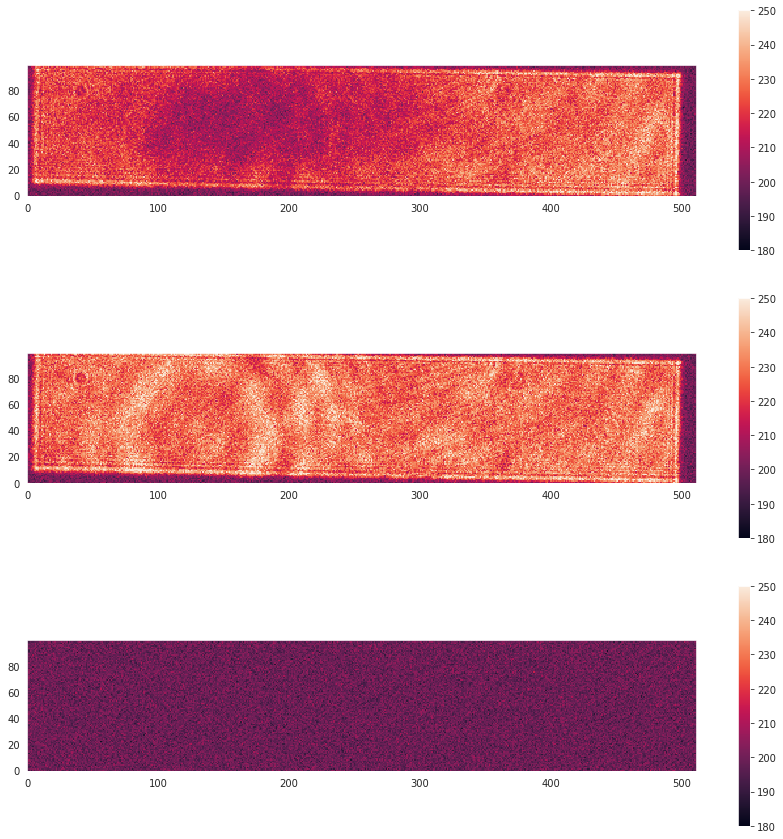

In [78]:
fits_image = fits.open(image_paths[99])
image_atoms =fits_image[0].data[atoms]
image_beam = fits_image[0].data[beam]
image_bg = fits_image[0].data[bg]

fig,ax = plt.subplots(3,1,figsize=(15,15))

vmin=180
vmax=250

ax[0].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0])
ax[1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1])
ax[2].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2])
plt.show()

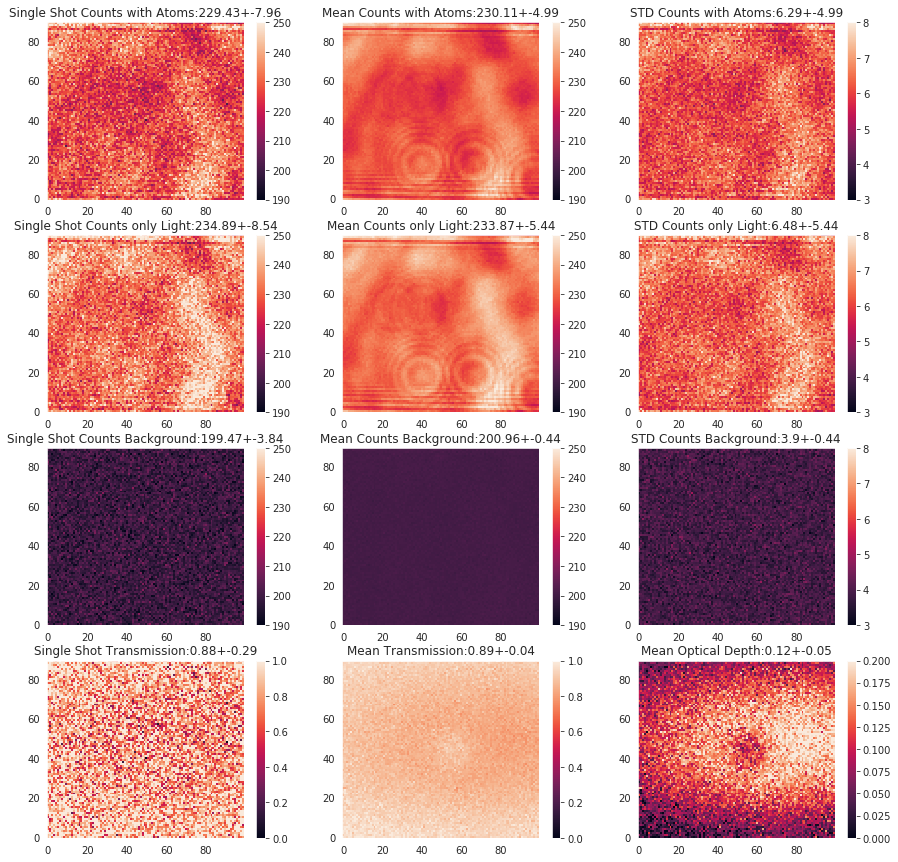

In [247]:
file_date = '2019-07-24'
slicer = (slice(10,110),slice(100,200))


def fitsopen_std(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/std')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgnoise=images[1][slicer]
    lightnoise=images[2][slicer]
    atomnoise=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atomnoise,lightnoise,bgnoise

def fitsopen_mean(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/mean')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgmean=images[1][slicer]
    lightmean=images[2][slicer]
    atommean=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atommean,lightmean,bgmean

PICTURE=5


image_atoms=fitsopen_mean(PICTURE)[0]
image_beam=fitsopen_mean(PICTURE)[1]
image_bg=fitsopen_mean(PICTURE)[2]

noise_atoms=fitsopen_std(PICTURE)[0]
noise_beam=fitsopen_std(PICTURE)[1]
noise_bg=fitsopen_std(PICTURE)[2]

image_paths1 = paths['images'].iloc[PICTURE]
fits_image1 = fits.open(image_paths1[99])

image_atoms1 =fits_image1[0].data[atoms]
image_beam1 = fits_image1[0].data[beam]
image_bg1 = fits_image1[0].data[bg]

image_atoms1=image_atoms1[slicer]
image_beam1=image_beam1[slicer]
image_bg1=image_bg1[slicer]

T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))

T1=(image_atoms1.astype(float)-image_bg1.astype(float))/(image_beam1.astype(float)-image_bg1.astype(float))

OD=-np.log(T)

fig,ax = plt.subplots(4,3,figsize=(15,15))

vmin=190
vmax=250
vminnoise=3
vmaxnoise=8



ax[0,0].set_title('Single Shot Counts with Atoms:'+str(round(np.mean(image_atoms1),2))+"+-"+str(round(np.std(image_atoms1),2)))
ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,0])
ax[1,0].set_title('Single Shot Counts only Light:'+str(round(np.mean(image_beam1),2))+"+-"+str(round(np.std(image_beam1),2)))
ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,0])
ax[2,0].set_title('Single Shot Counts Background:'+str(round(np.mean(image_bg1),2))+"+-"+str(round(np.std(image_bg1),2)))
ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,0])
ax[3,0].set_title('Single Shot Transmission:'+str(round(np.mean(T1),2))+"+-"+str(round(np.std(T1),2)))
ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1),ax=ax[3,0])
ax[0,1].set_title('Mean Counts with Atoms:'+str(round(np.mean(image_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,1])
ax[1,1].set_title('Mean Counts only Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,1])
ax[2,1].set_title('Mean Counts Background:'+str(round(np.mean(image_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,1])
ax[3,1].set_title('Mean Transmission:'+str(round(np.mean(T),2))+"+-"+str(round(np.std(T),2)))
ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1),ax=ax[3,1])
ax[0,2].set_title('STD Counts with Atoms:'+str(round(np.mean(noise_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[0,2])
ax[1,2].set_title('STD Counts only Light:'+str(round(np.mean(noise_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[1,2])
ax[2,2].set_title('STD Counts Background:'+str(round(np.mean(noise_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[2,2])
ax[3,2].set_title('Mean Optical Depth:'+str(round(np.mean(OD),2))+"+-"+str(round(np.std(OD),2)))
ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=0.2),ax=ax[3,2])
plt.show()


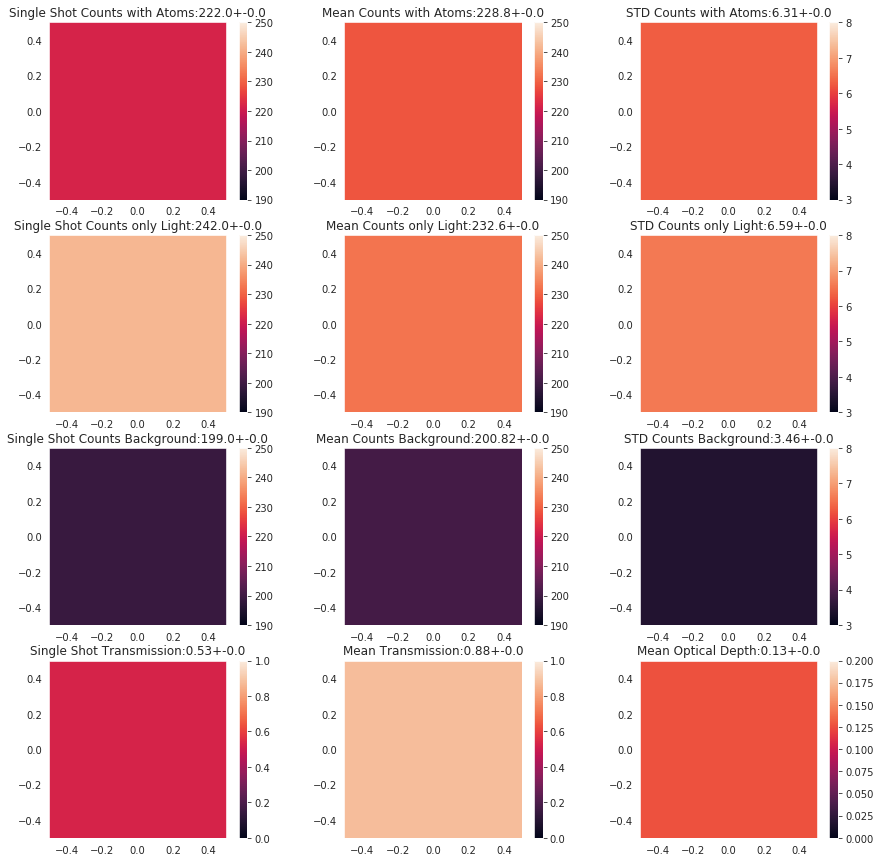

In [257]:
file_date = '2019-07-24'
slicer = (slice(59,60),slice(159,160))


def fitsopen_std(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/std')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgnoise=images[1][slicer]
    lightnoise=images[2][slicer]
    atomnoise=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atomnoise,lightnoise,bgnoise

def fitsopen_mean(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/mean')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgmean=images[1][slicer]
    lightmean=images[2][slicer]
    atommean=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atommean,lightmean,bgmean

PICTURE=5


image_atoms=fitsopen_mean(PICTURE)[0]
image_beam=fitsopen_mean(PICTURE)[1]
image_bg=fitsopen_mean(PICTURE)[2]

noise_atoms=fitsopen_std(PICTURE)[0]
noise_beam=fitsopen_std(PICTURE)[1]
noise_bg=fitsopen_std(PICTURE)[2]

image_paths1 = paths['images'].iloc[PICTURE]
fits_image1 = fits.open(image_paths1[99])

image_atoms1 =fits_image1[0].data[atoms]
image_beam1 = fits_image1[0].data[beam]
image_bg1 = fits_image1[0].data[bg]

image_atoms1=image_atoms1[slicer]
image_beam1=image_beam1[slicer]
image_bg1=image_bg1[slicer]

T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))

T1=(image_atoms1.astype(float)-image_bg1.astype(float))/(image_beam1.astype(float)-image_bg1.astype(float))

OD=-np.log(T)

fig,ax = plt.subplots(4,3,figsize=(15,15))

vmin=190
vmax=250
vminnoise=3
vmaxnoise=8



ax[0,0].set_title('Single Shot Counts with Atoms:'+str(round(np.mean(image_atoms1),2))+"+-"+str(round(np.std(image_atoms1),2)))
ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,0])
ax[1,0].set_title('Single Shot Counts only Light:'+str(round(np.mean(image_beam1),2))+"+-"+str(round(np.std(image_beam1),2)))
ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,0])
ax[2,0].set_title('Single Shot Counts Background:'+str(round(np.mean(image_bg1),2))+"+-"+str(round(np.std(image_bg1),2)))
ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,0])
ax[3,0].set_title('Single Shot Transmission:'+str(round(np.mean(T1),2))+"+-"+str(round(np.std(T1),2)))
ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1),ax=ax[3,0])
ax[0,1].set_title('Mean Counts with Atoms:'+str(round(np.mean(image_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,1])
ax[1,1].set_title('Mean Counts only Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,1])
ax[2,1].set_title('Mean Counts Background:'+str(round(np.mean(image_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,1])
ax[3,1].set_title('Mean Transmission:'+str(round(np.mean(T),2))+"+-"+str(round(np.std(T),2)))
ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1),ax=ax[3,1])
ax[0,2].set_title('STD Counts with Atoms:'+str(round(np.mean(noise_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[0,2])
ax[1,2].set_title('STD Counts only Light:'+str(round(np.mean(noise_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[1,2])
ax[2,2].set_title('STD Counts Background:'+str(round(np.mean(noise_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[2,2])
ax[3,2].set_title('Mean Optical Depth:'+str(round(np.mean(OD),2))+"+-"+str(round(np.std(OD),2)))
ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=0.2),ax=ax[3,2])
plt.show()

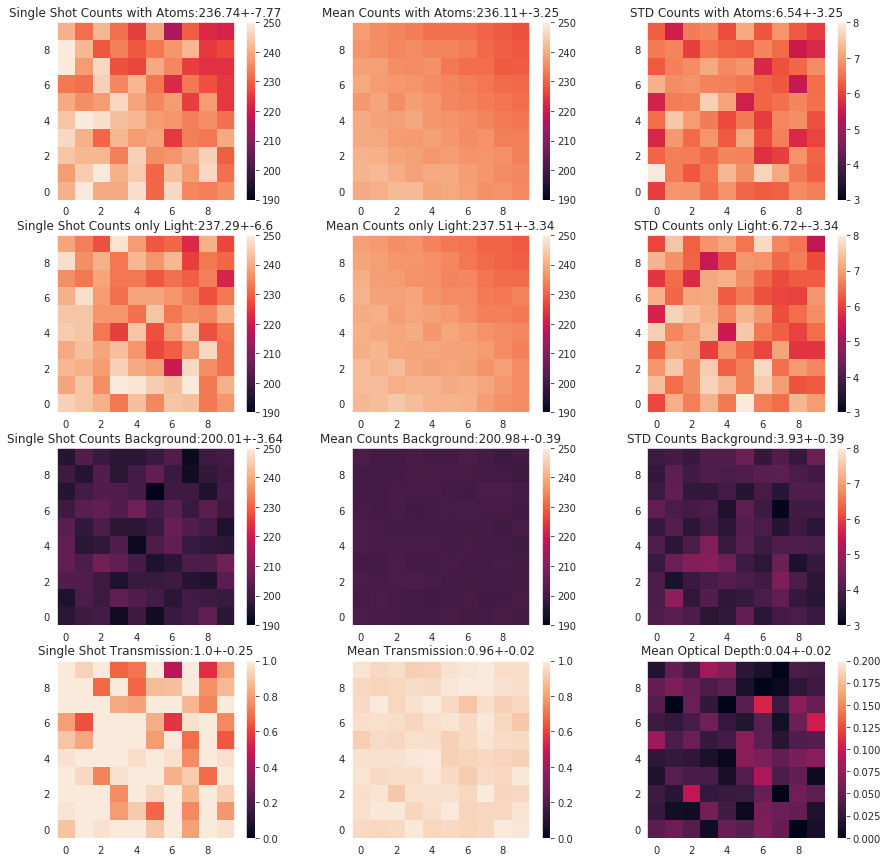

In [256]:
slicer = (slice(50,60),slice(180,190))

PICTURE=0


image_atoms=fitsopen_mean(PICTURE)[0]
image_beam=fitsopen_mean(PICTURE)[1]
image_bg=fitsopen_mean(PICTURE)[2]

noise_atoms=fitsopen_std(PICTURE)[0]
noise_beam=fitsopen_std(PICTURE)[1]
noise_bg=fitsopen_std(PICTURE)[2]

image_paths1 = paths['images'].iloc[PICTURE]
fits_image1 = fits.open(image_paths1[99])

image_atoms1 =fits_image1[0].data[atoms]
image_beam1 = fits_image1[0].data[beam]
image_bg1 = fits_image1[0].data[bg]

image_atoms1=image_atoms1[slicer]
image_beam1=image_beam1[slicer]
image_bg1=image_bg1[slicer]

T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))

T1=(image_atoms1.astype(float)-image_bg1.astype(float))/(image_beam1.astype(float)-image_bg1.astype(float))

OD=-np.log(T)

fig,ax = plt.subplots(4,3,figsize=(15,15))

vmin=190
vmax=250
vminnoise=3
vmaxnoise=8



ax[0,0].set_title('Single Shot Counts with Atoms:'+str(round(np.mean(image_atoms1),2))+"+-"+str(round(np.std(image_atoms1),2)))
ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,0])
ax[1,0].set_title('Single Shot Counts only Light:'+str(round(np.mean(image_beam1),2))+"+-"+str(round(np.std(image_beam1),2)))
ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,0])
ax[2,0].set_title('Single Shot Counts Background:'+str(round(np.mean(image_bg1),2))+"+-"+str(round(np.std(image_bg1),2)))
ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,0])
ax[3,0].set_title('Single Shot Transmission:'+str(round(np.mean(T1),2))+"+-"+str(round(np.std(T1),2)))
ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1),ax=ax[3,0])
ax[0,1].set_title('Mean Counts with Atoms:'+str(round(np.mean(image_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,1])
ax[1,1].set_title('Mean Counts only Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,1])
ax[2,1].set_title('Mean Counts Background:'+str(round(np.mean(image_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,1])
ax[3,1].set_title('Mean Transmission:'+str(round(np.mean(T),2))+"+-"+str(round(np.std(T),2)))
ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1),ax=ax[3,1])
ax[0,2].set_title('STD Counts with Atoms:'+str(round(np.mean(noise_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[0,2])
ax[1,2].set_title('STD Counts only Light:'+str(round(np.mean(noise_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[1,2])
ax[2,2].set_title('STD Counts Background:'+str(round(np.mean(noise_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[2,2])
ax[3,2].set_title('Mean Optical Depth:'+str(round(np.mean(OD),2))+"+-"+str(round(np.std(OD),2)))
ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=0.2),ax=ax[3,2])
plt.show()

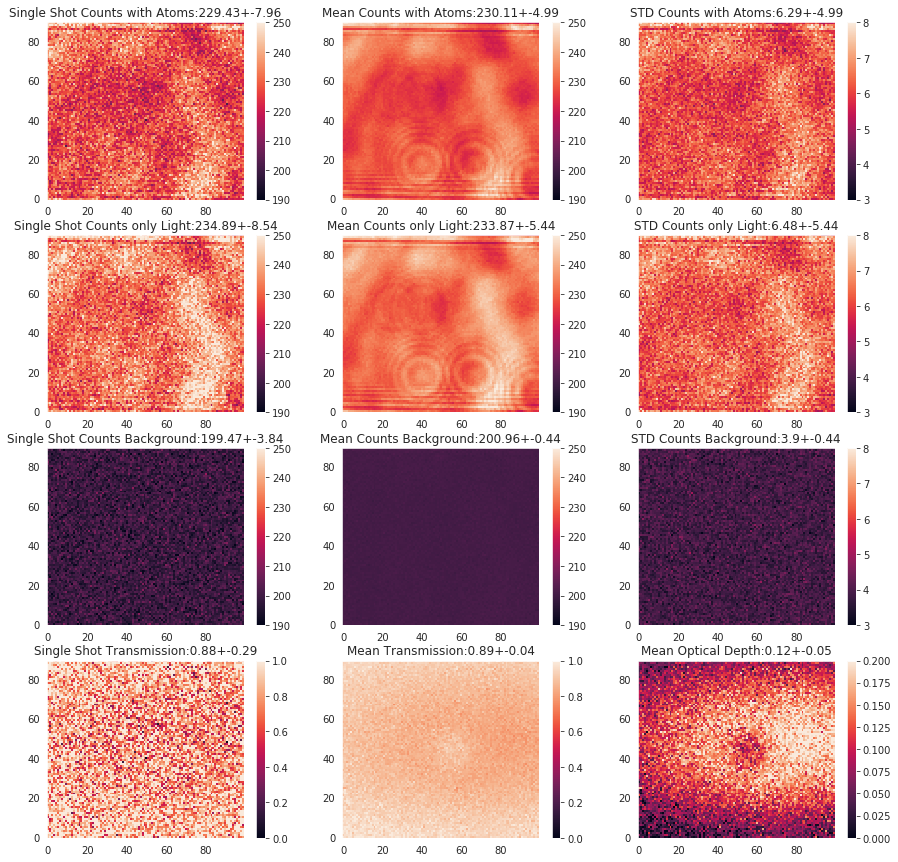

In [276]:
file_date = '2019-07-24'
slicer = (slice(10,110),slice(100,200))


def fitsopen_std(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/std')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgnoise=images[1][slicer]
    lightnoise=images[2][slicer]
    atomnoise=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atomnoise,lightnoise,bgnoise

def fitsopen_mean(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/mean')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgmean=images[1][slicer]
    lightmean=images[2][slicer]
    atommean=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atommean,lightmean,bgmean

PICTURE=5


image_atoms=fitsopen_mean(PICTURE)[0]
image_beam=fitsopen_mean(PICTURE)[1]
image_bg=fitsopen_mean(PICTURE)[2]

noise_atoms=fitsopen_std(PICTURE)[0]
noise_beam=fitsopen_std(PICTURE)[1]
noise_bg=fitsopen_std(PICTURE)[2]

image_paths1 = paths['images'].iloc[PICTURE]
fits_image1 = fits.open(image_paths1[99])


image_atoms1 =fits_image1[0].data[atoms]
image_beam1 = fits_image1[0].data[beam]
image_bg1 = fits_image1[0].data[bg]

image_atoms1=image_atoms1[slicer]
image_beam1=image_beam1[slicer]
image_bg1=image_bg1[slicer]

reduced=image_beam-image_bg


T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))

T1=(image_atoms1.astype(float)-image_bg1.astype(float))/(image_beam1.astype(float)-image_bg1.astype(float))

OD=-np.log(T)

fig,ax = plt.subplots(4,3,figsize=(15,15))

vmin=190
vmax=250
vminnoise=3
vmaxnoise=8



ax[0,0].set_title('Single Shot Counts with Atoms:'+str(round(np.mean(image_atoms1),2))+"+-"+str(round(np.std(image_atoms1),2)))
ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,0].imshow(image_atoms1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,0])
ax[1,0].set_title('Single Shot Counts only Light:'+str(round(np.mean(image_beam1),2))+"+-"+str(round(np.std(image_beam1),2)))
ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,0].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,0])
ax[2,0].set_title('Single Shot Counts Background:'+str(round(np.mean(image_bg1),2))+"+-"+str(round(np.std(image_bg1),2)))
ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,0].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,0])
ax[3,0].set_title('Single Shot Transmission:'+str(round(np.mean(T1),2))+"+-"+str(round(np.std(T1),2)))
ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,0].imshow(T1, origin='bottom',vmin=0, vmax=1),ax=ax[3,0])
ax[0,1].set_title('Mean Counts with Atoms:'+str(round(np.mean(image_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0,1].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0,1])
ax[1,1].set_title('Mean Counts only Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1,1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1,1])
ax[2,1].set_title('Mean Counts Background:'+str(round(np.mean(image_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2,1].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2,1])
ax[3,1].set_title('Mean Transmission:'+str(round(np.mean(T),2))+"+-"+str(round(np.std(T),2)))
ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,1].imshow(T, origin='bottom',vmin=0, vmax=1),ax=ax[3,1])
ax[0,2].set_title('STD Counts with Atoms:'+str(round(np.mean(noise_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[0,2].imshow(noise_atoms, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[0,2])
ax[1,2].set_title('STD Counts only Light:'+str(round(np.mean(noise_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[1,2].imshow(noise_beam, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[1,2])
ax[2,2].set_title('STD Counts Background:'+str(round(np.mean(noise_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise)
fig.colorbar(ax[2,2].imshow(noise_bg, origin='bottom',vmin=vminnoise, vmax=vmaxnoise),ax=ax[2,2])
ax[3,2].set_title('Mean Optical Depth:'+str(round(np.mean(OD),2))+"+-"+str(round(np.std(OD),2)))
ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3,2].imshow(OD, origin='bottom',vmin=0, vmax=0.2),ax=ax[3,2])

plt.show()


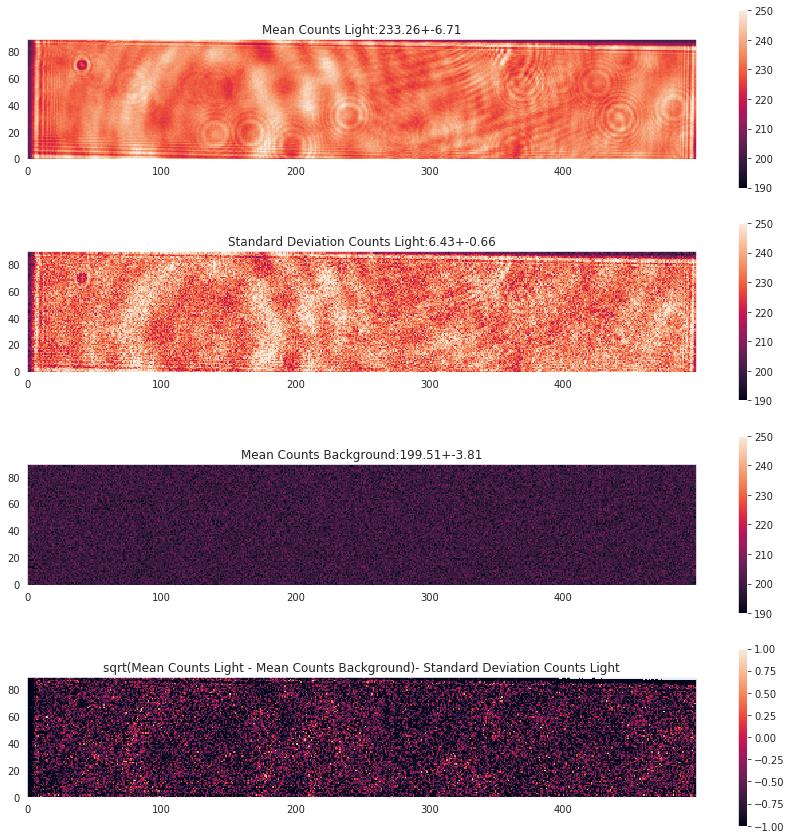

In [308]:
file_date = '2019-07-24'
slicer = (slice(10,110),slice(0,500))


def fitsopen_std(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/std')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgnoise=images[1][slicer]
    lightnoise=images[2][slicer]
    atomnoise=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atomnoise,lightnoise,bgnoise

def fitsopen_mean(n):
    os.chdir(path+'/DensityScanOvernight FULL Sequence_averaged_images/mean')
    hdulist = pyfits.open(file_date+str("_")+str(n).zfill(3)+'.fts')
    images = hdulist[0].data
    bgmean=images[1][slicer]
    lightmean=images[2][slicer]
    atommean=images[0][slicer]
    #absorb_weights = 1/images[0]
    #no_absorb_weights = 1/images[1]
    #div = (absorb-bg)/(no_absorb-bg)
    #absorb_weights = absorb_weights[slicer]
    #absorb_weights = -np.log(absorb_weights)
    #absorb_weights = np.nan_to_num(absorb_weights)
    os.chdir(path)
    return atommean,lightmean,bgmean

PICTURE=5


image_atoms=fitsopen_mean(PICTURE)[0]
image_beam=fitsopen_mean(PICTURE)[1]
image_bg=fitsopen_mean(PICTURE)[2]

noise_atoms=fitsopen_std(PICTURE)[0]
noise_beam=fitsopen_std(PICTURE)[1]
noise_bg=fitsopen_std(PICTURE)[2]

image_paths1 = paths['images'].iloc[PICTURE]
fits_image1 = fits.open(image_paths1[99])


image_atoms1 =fits_image1[0].data[atoms]
image_beam1 = fits_image1[0].data[beam]
image_bg1 = fits_image1[0].data[bg]

image_atoms1=image_atoms1[slicer]
image_beam1=image_beam1[slicer]
image_bg1=image_bg1[slicer]

reduced=np.sqrt(image_beam-image_bg)-noise_beam


T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))

T1=(image_atoms1.astype(float)-image_bg1.astype(float))/(image_beam1.astype(float)-image_bg1.astype(float))

OD=-np.log(T)

fig,ax = plt.subplots(4,1,figsize=(15,15))

vmin=190
vmax=250
vminnoise=3
vmaxnoise=8



ax[0].set_title('Mean Counts Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[0].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0])
ax[1].set_title('Standard Deviation Counts Light:'+str(round(np.mean(noise_beam),2))+"+-"+str(round(np.std(noise_beam),2)))
ax[1].imshow(noise_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1].imshow(image_beam1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1])
ax[2].set_title('Mean Counts Background:'+str(round(np.mean(image_bg1),2))+"+-"+str(round(np.std(image_bg1),2)))
ax[2].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2].imshow(image_bg1, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2])
ax[3].set_title('sqrt(Mean Counts Light - Mean Counts Background)- Standard Deviation Counts Light')
ax[3].imshow(reduced, origin='bottom',vmin=-1, vmax=1)
fig.colorbar(ax[3].imshow(reduced, origin='bottom',vmin=-1, vmax=1),ax=ax[3])
plt.show()

In [170]:
pixel_atoms=[]
pixel_beam=[]
pixel_bg=[]

for j in range(0,50):
    image_paths = paths['images'].iloc[j]
    for i in range(len(image_paths)):
        fits_image = fits.open(image_paths[i])
        image_atoms_matrix[i] = fits_image[0].data[1]
        image_beam_matrix[i] = fits_image[0].data[2]
        image_bg_matrix[i] = fits_image[0].data[3]
    
    image_atoms_mean = np.mean(image_atoms_matrix,axis=0)
    image_atoms_std = np.std(image_atoms_matrix,axis=0)
    image_beam_mean = np.mean(image_beam_matrix,axis=0)
    image_beam_std = np.std(image_beam_matrix,axis=0)
    image_bg_mean = np.mean(image_bg_matrix,axis=0)
    image_bg_std = np.std(image_bg_matrix,axis=0)
    # filename
    counter = str(j)
    counter = counter.zfill(3)
    filename = date +'_'+ counter
    
    # save mean images
    hdu1_mean = fits.PrimaryHDU(([image_atoms_mean,image_beam_mean,image_bg_mean]))
    hdul_mean = fits.HDUList([hdu1_mean])
    directory_mean = savefolder +  'mean'
    if not os.path.exists(directory_mean):
        os.makedirs(directory_mean)
    
    hdul_mean.writeto(directory_mean +'/'+ filename+'.fts')
    
    
    # save std images
    hdu1_std = fits.PrimaryHDU(([image_atoms_std,image_beam_std,image_bg_std]))
    hdul_std = fits.HDUList([hdu1_std])
    directory_std = savefolder +  'std'
    if not os.path.exists(directory_std):
        os.makedirs(directory_std)
    
    hdul_std.writeto(directory_std +'/'+ filename+'.fts')
    
    # append variable to variableList
    variableList.append((j,image_paths.name))

    

        

OSError: File '/home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence_averaged_images/mean/2019-07-24_000.fts' already exists.

In [ ]:
slicer = (slice(50,80),slice(130,160))

image_atoms=image_atoms[slicer]
image_beam=image_beam[slicer]
image_bg=image_bg[slicer]

T=(image_atoms.astype(float)-image_bg.astype(float))/(image_beam.astype(float)-image_bg.astype(float))
OD=-np.log(T)

fig,ax = plt.subplots(4,1,figsize=(15,15))

vmin=190
vmax=250

ax[0].set_title('Mean Counts with Atoms:'+str(round(np.mean(image_atoms),2))+"+-"+str(round(np.std(image_atoms),2)))
ax[0].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[0].imshow(image_atoms, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[0])
ax[1].set_title('Mean Counts only Light:'+str(round(np.mean(image_beam),2))+"+-"+str(round(np.std(image_beam),2)))
ax[1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[1].imshow(image_beam, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[1])
ax[2].set_title('Mean Counts Background:'+str(round(np.mean(image_bg),2))+"+-"+str(round(np.std(image_bg),2)))
ax[2].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax)
fig.colorbar(ax[2].imshow(image_bg, origin='bottom',vmin=vmin, vmax=vmax),ax=ax[2])
ax[3].set_title('Transmission:'+str(round(np.mean(T),2))+"+-"+str(round(np.std(T),2)))
ax[3].imshow(T, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[3].imshow(T, origin='bottom',vmin=0, vmax=1),ax=ax[3])
#ax[4].set_title('Optical Depth:'+str(np.mean(OD))+"+-"+str(np.std(OD)))
#ax[4].imshow(OD, origin='bottom',vmin=0, vmax=1)
#fig.colorbar(ax[4].imshow(OD, origin='bottom',vmin=0, vmax=1),ax=ax[4])
plt.show()

In [169]:
print(np.mean(pixel_atoms),"+-",np.std(pixel_atoms))
print(np.mean(pixel_beam),"+-",np.std(pixel_beam))
print(np.mean(pixel_bg),"+-",np.std(pixel_bg))

228.7726 +- 8.42705697382
241.6948 +- 6.87857928354
199.5908 +- 3.85089020358


In [51]:
from sys import path, argv
import os
import xarray as xr
from prefect import task
path.insert(0, '/home/david/Institut/data-analysis/rydanalysis/')
from rydanalysis import *
from rydanalysis.single_shot.image_processing import *


def create_analysis_dir(seq_path,analysis_root):
    analysis_dir = Directory(os.path.join(analysis_root,seq_path))
    return analysis_dir.path


def create_new_data_dir(seq_path,data_root):
    data_dir = Directory(os.path.join(data_root,seq_path))
    return data_dir.path


def old_to_new_datastructure(in_dir , out_dir):
    old_scan = OldStructure(in_dir)
    old_scan.create_new(out_dir)
    return out_dir


def calc_batch_transmission(seq_dir, out_dir,
                            remove_fringes=True,
                            replace_invalid=True,
                            ref_basis=10,
                            mask=None,
                            mask_kwargs=None,
                            xslice=slice(None),
                            yslice=slice(None)):
    
    """Calculate the transmission images for a sequence of raw experimental data
    Args:
    :param seq_dir: directory of the raw data in the new format
    :param out_dir: directory to store the calculated transmission images
    :param remove_fringes: 
    :param replace_invalid: 
    :param ref_basis: 
    :param mask: 
    :param mask_kwargs: 
    :param xslice: 
    :param yslice: 
    """
     
    seq = ExpSequence(seq_dir)
    im = seq.raw_data.get_images()
    im = im.isel({'x':xslice,'y':yslice})
    bg = im['image_05']
    ref = im['image_03']-bg
    atoms = im['image_01']-bg
    
    if remove_fringes:
        if mask=='elliptical':
            mask = elliptical_mask(ref[0].shape,**mask_kwargs)
        refimages = agnostic_select(ref,ref_basis).values
        B_inv, R = prepare_ref_basis(refimages,mask=mask)
        ref = xr.apply_ufunc(calc_ref_image,
                         atoms,
                         kwargs=dict(mask=mask,B_inv=B_inv,R=R),
                         vectorize=True,
                         input_core_dims=[['x','y']],
                         output_core_dims=[['x','y']])
        
    if replace_invalid:
        ref = xr.apply_ufunc(nn_replace_invalid,
                                   ref,
                                   kwargs=dict(invalid=0),
                                   vectorize=True,
                                   input_core_dims=[['x','y']],
                                   output_core_dims=[['x','y']])
        
    trans = atoms.astype(float)/ref
    trans.name='transmission'
    trans = trans.reset_index('concat_dim')
    trans.to_netcdf(os.path.join(out_dir,'transmission.h5'))
    return trans

ImportError: No module named 'prefect'

In [23]:
# --------------------------------------------------------------------------
# ----- MAKE CHANGES HERE --------------------------------------------------
# --------------------------------------------------------------------------
date = '2019-07-24' # date of measurement
atoms =  1  # number of image in fits file
beam = 3
bg = 5
# --------------------------------------------------------------------------
# --------------------------------------------------------------------------



# ----- initialisations --------------------------------------------------

iterator = tqdm_notebook(range(len(paths['images'])),desc='calculating...', leave=False) #len(paths['images'])
variableList = []


# ---- calculate averaged images ---------------------------------------------

for j in iterator:
    
    # ---- remove non excisting images, when a run was not completed ---------
    bad_images = []
    for w in range(len(paths['images'].iloc[j])):
        if paths['images'].iloc[j][w][100:] == 'None':
            bad_images.append(w)

    if len(bad_images)==0:
        #print(paths['images'].iloc[j])
        image_paths = paths['images'].iloc[j]
    else:
        image_paths = paths['images'].iloc[j][:bad_images[0]]
        
    
    # ----- initialisations --------------------------------------------------
    dimY=100*binning_scale
    dimX = 512*binning_scale
    L = len(image_paths)
    image_atoms_matrix = np.zeros((L,dimY,dimX))
    image_beam_matrix = np.zeros((L,dimY,dimX))
    image_bg_matrix = np.zeros((L,dimY,dimX))

    # ---- calculated averaged and std images --------------------------------------
    for i in range(len(image_paths)):
        fits_image = fits.open(image_paths[i])
        image_atoms_matrix[i] = fits_image[0].data[1]
        image_beam_matrix[i] = fits_image[0].data[2]
        image_bg_matrix[i] = fits_image[0].data[3]
    
    image_atoms_mean = np.mean(image_atoms_matrix,axis=0)
    image_atoms_std = np.std(image_atoms_matrix,axis=0)
    image_beam_mean = np.mean(image_beam_matrix,axis=0)
    image_beam_std = np.std(image_beam_matrix,axis=0)
    image_bg_mean = np.mean(image_bg_matrix,axis=0)
    image_bg_std = np.std(image_bg_matrix,axis=0)
    
    # filename
    counter = str(j)
    counter = counter.zfill(3)
    filename = date +'_'+ counter
    
    # save mean images
    hdu1_mean = fits.PrimaryHDU(([image_atoms_mean,image_beam_mean,image_bg_mean]))
    hdul_mean = fits.HDUList([hdu1_mean])
    directory_mean = savefolder +  'mean'
    if not os.path.exists(directory_mean):
        os.makedirs(directory_mean)
    
    hdul_mean.writeto(directory_mean +'/'+ filename+'.fts')
    
    
    # save std images
    hdu1_std = fits.PrimaryHDU(([image_atoms_std,image_beam_std,image_bg_std]))
    hdul_std = fits.HDUList([hdu1_std])
    directory_std = savefolder +  'std'
    if not os.path.exists(directory_std):
        os.makedirs(directory_std)
    
    hdul_std.writeto(directory_std +'/'+ filename+'.fts')
    
    # append variable to variableList
    variableList.append((j,image_paths.name))
    
# save variables in both folders
np.savetxt(directory_mean +'/'+ date +'_variables.dat',variableList, fmt='%5.3f',delimiter=' ', newline=os.linesep)
np.savetxt(directory_std +'/'+ date +'_variables.dat',variableList, fmt='%5.3f',delimiter=' ', newline=os.linesep)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_25_02.31.26_full.fts
1     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_23.45.50_full.fts
2     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_21.58.32_full.fts
3     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_19.29.58_full.fts
4     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_22.42.06_full.fts
5     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_23.19.02_full.fts
6     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_25_00.30.43_full.fts
7     /home/qd/Schreibtisch/Data/2019_IEI/July/24/DensityScanOvernight FULL Sequence/FITS Files/2019_07_24_22.07.10_full.fts
